# Exploratory Data Analysis

### *Importing libraries and reading the data*

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cleaning 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data = pd.read_csv('reddit-india-data.csv', parse_dates=['timestamp'])
data.body.fillna('', inplace=True)
data.tail()

,id,flair,title,body,comments,score,author,url,domain,comms_num,timestamp
2418,fvxp4n,Photography,"Lone House at Loktak Lake, Manipur [OC] [6000x...",,"Location - Loktak Lake, Manipur\n\nDevice us...",18,kingof-potatos,https://i.redd.it/trpvocirv6r41.jpg,reddit.com,3,2020-04-07 01:45:54
2419,fcsymx,Sports,When you cross 30 it affects your eyesight: Ka...,,I can imagine googly-eyed Kohli.,23,Ku_hu,https://www.business-standard.com/article/spor...,business-standard.com,1,2020-03-04 00:31:23
2420,dnrkxp,Sports,Copy India's ambition to be the best: Ian Chap...,,Credit should go to kohli for giving utmost ...,22,Shellynoire,https://www.indiatvnews.com/sports/cricket-cop...,indiatvnews.com,5,2019-10-28 00:00:24
2421,enm17q,Sports,India finish 2019 as number one shooting natio...,,> While **India leads the standings with 30 ...,28,Shellynoire,https://www.thehindu.com/sport/other-sports/in...,thehindu.com,17,2020-01-13 00:06:36
2422,e3umqx,Sports,"Leander Paes betters Davis Cup record, India q...",,Leander's a beast. Respect to this great man...,29,xuxebiko,https://www.thehindu.com/sport/tennis/leander-...,thehindu.com,6,2019-12-01 00:24:26


## Top 20 domains and number of submissions
Most of these domains are from news websites. It is important to distinguish between the domains **"self-post"** and **"reddit.com"**. The reddit.com domain includes images, videos and urls to comments or submissions by other users, but it does not include text-only posts known as self-posts.

It's observed that majority of the submissions are self-posts, followed by reddit.com containing images/videos or memes.

In [3]:
data['domain'].value_counts().to_frame()[:20]

,domain
self-post,913
reddit.com,461
indiatimes.com,94
imgur.com,74
youtube.com,58
ndtv.com,56
indianexpress.com,46
thehindu.com,45
twitter.com,45
livemint.com,43


## Flairs and their mean/max scores
Scores on reddit refer to (upvotes - downvotes). Analyzing the mean of all submissions in the hot-posts, it can be noted that Non-Political flair gets the most number of upvotes and hence are more popular among people.

Flair                Mean score      Max score 

AskIndia             70.67            1045
Non-Political        688.59            5928
Policy/Economy       203.79            5815
Photography          361.98            3947
Science/Technology   104.92            3060
Politics             862.34           17864
Business/Finance     112.09            3004
Sports               205.07            3473
Food                 214.73            3127
Scheduled            30.99            1697


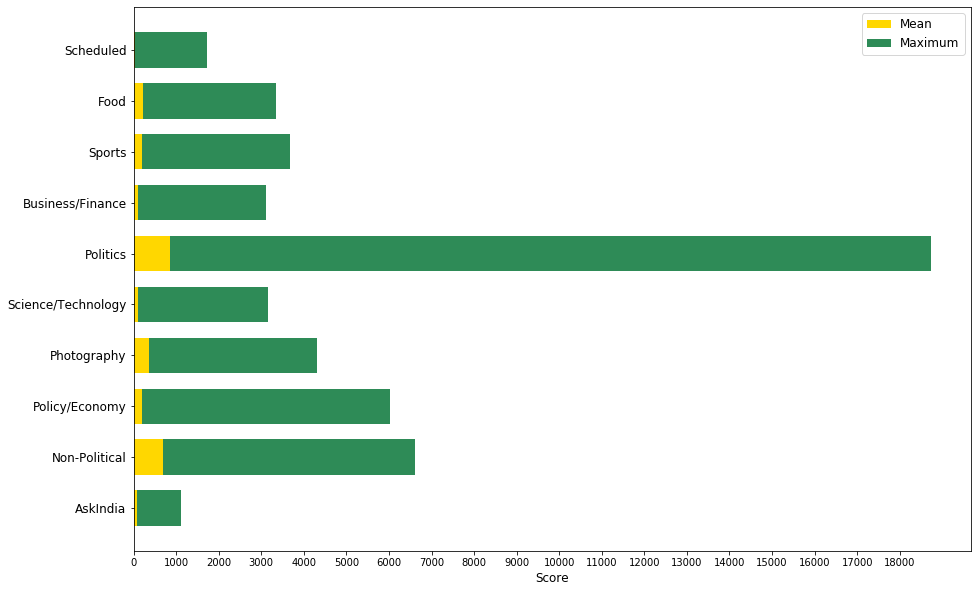

In [4]:
flairs = ["AskIndia", "Non-Political", "Policy/Economy", "Photography", "Science/Technology", "Politics", "Business/Finance", 
          "Sports", "Food", "Scheduled"]
mean_score = {}
max_score = {}
for flair in flairs:
    mean_score[flair] = np.mean(data[data.flair == flair]['score'])
    max_score[flair] = np.max(data[data.flair == flair]['score'])

print("{:<20} {:<15} {} \n".format('Flair', 'Mean score', 'Max score'))
for key,val in mean_score.items():
    print("{:<20} {:.2f} {:>15}".format(key, val, max_score[key])) 

plt.figure(figsize =(15,10))
plt.barh(np.arange(len(flairs)), mean_score.values(), color='gold', height=0.7, label = 'Mean')
plt.barh(np.arange(len(flairs)), max_score.values(), color='seagreen', height=0.7, left = list(mean_score.values()), label = 'Maximum')
plt.yticks(np.arange(len(mean_score)),list(mean_score.keys()), fontsize=12)
plt.xticks(np.arange(0, max(max_score.values())+1000, step=1000))
plt.xlabel("Score", fontsize=12)
plt.legend(loc="upper right", fontsize=12)
plt.show()

## Average number of comments per post
It is observed that "scheduled" discussion threads have the most number of comments on average. This pretty much verifies the motive of such posts. This is followed by politics, which is generally a controversial topic.

No handles with labels found to put in legend.


Flair                Mean no. of comments 

AskIndia             39.52
Non-Political        78.42
Policy/Economy       32.15
Photography          21.15
Science/Technology   18.71
Politics             123.85
Business/Finance     18.59
Sports               16.06
Food                 36.95
Scheduled            1179.75


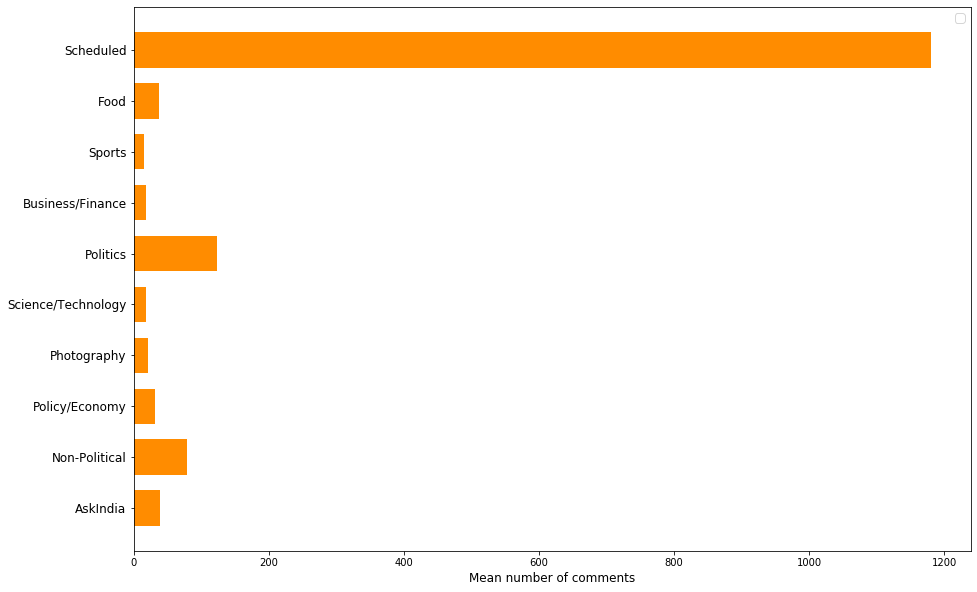

In [5]:
flairs = ["AskIndia", "Non-Political", "Policy/Economy", "Photography", "Science/Technology", "Politics", "Business/Finance", 
          "Sports", "Food", "Scheduled"]
mean_score = {}
for flair in flairs:
    mean_score[flair] = np.mean(data[data.flair == flair]['comms_num'])

print("{:<20} {:<15} \n".format('Flair', 'Average no. of comments'))
for key,val in mean_score.items():
    print("{:<20} {:.2f}".format(key, val)) 

plt.figure(figsize =(15,10))
plt.barh(np.arange(len(flairs)), mean_score.values(), color='darkorange', height=0.7)
plt.yticks(np.arange(len(mean_score)),list(mean_score.keys()), fontsize=12)
plt.xlabel("Avg number of comments", fontsize=12)
plt.show()

## Title length of posts
Length of title in words varies greatly. Most of the posts/submissions have a title length of around 40-50 words.

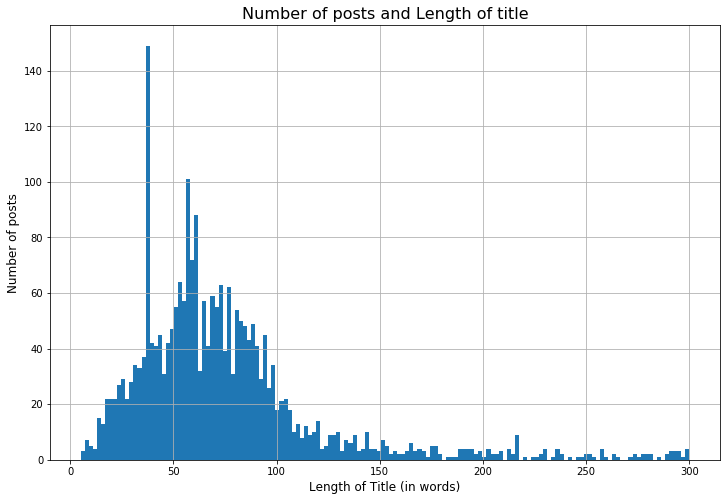

In [6]:
temp = data.title.str.len()
temp.hist(bins = 150, figsize =(12,8))

plt.title("Number of posts and Length of title", fontsize=16)
plt.xlabel("Length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.show()

## ***Time-series analysis***

## Which weekday gets the most submissions?
Data is resampled on the basis of day of creation. The resampled dataframe contains the datetime and the respective weekday. A dictionary is created which counts total number of submissions on a particular weekday.

From the graph, it is observed that post-count gradually increases from Monday and is lesser on the weekend. This one is actually an interesting insight !

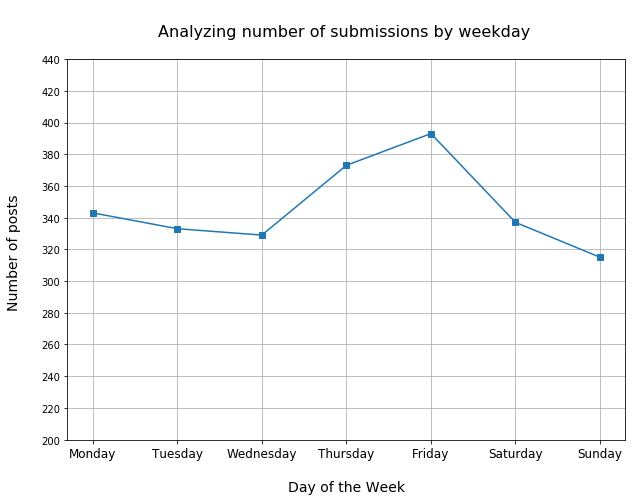

In [7]:
resampled_submissions = data.resample("D", on='timestamp').count()[['id']]
resampled_submissions.rename(columns = {'id':'total_posts'}, inplace = True) 
resampled_submissions['weekday'] = resampled_submissions.index.weekday

labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
total = len(data)
submissions_weekdays = {i: 0 for i in range(0, 7)}

for k, v in submissions_weekdays.items():
    submissions_weekdays[k] = np.sum(resampled_submissions.total_posts[resampled_submissions.weekday == k])

plt.figure(figsize =(10,7))
plt.plot(*zip(*sorted(submissions_weekdays.items())), marker='s')

plt.xticks(list(submissions_weekdays.keys()), labels, fontsize=12)
plt.yticks(np.arange(200, max(submissions_weekdays.values())+50, 20))
plt.xlabel("\nDay of the Week", fontsize=14)
plt.ylabel("Number of posts \n", fontsize=14)
plt.title("\nAnalyzing number of submissions by weekday \n", fontsize=16)
plt.grid()
plt.show()

## Getting more precise: Peak time in hours
Data is resampled on hour basis of the day now. Similar code as of weekdays is followed to generate a graph which would analyse number of submissions made at different hours of the day. 

Quite fascinating to note that the peak posting hours of the extracted hot-posts are 5 AM and 5 PM. This leads to the fact that our working hours (9to5 jobs) makes people post either in early morning or later when their day is wrapping up.

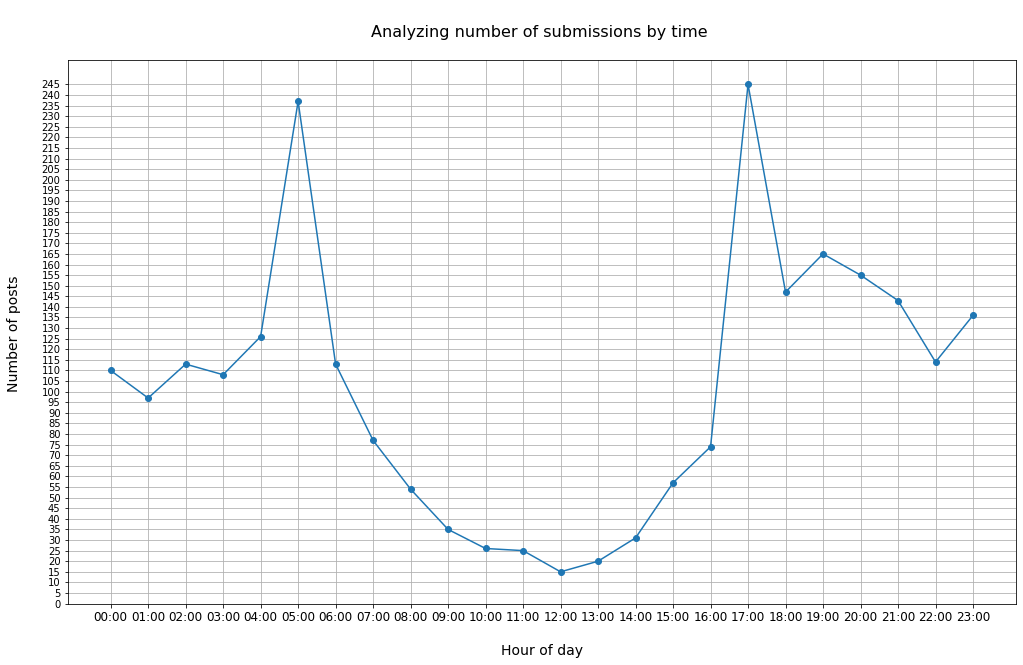

In [8]:
resampled_submissions = data.resample("H", on='timestamp').count()[['id']]
resampled_submissions.rename(columns = {'id':'total_posts'}, inplace = True) 
resampled_submissions['hour'] = resampled_submissions.index.hour

labels = ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", 
          "08:00", "09:00", "10:00", "11:00", "12:00", "13:00", "14:00", "15:00", 
          "16:00", "17:00", "18:00", "19:00", "20:00", "21:00", "22:00", "23:00"]

submissions_hrs = {i: 0 for i in range(0, 24)}

for k, v in submissions_hrs.items():
    submissions_hrs[k] = np.sum(resampled_submissions.total_posts[resampled_submissions.hour == k])

plt.figure(figsize = (17,10))
plt.plot(*zip(*sorted(submissions_hrs.items())), marker='o')

plt.xticks(list(submissions_hrs.keys()), labels, fontsize=12)
plt.yticks(np.arange(0, max(submissions_hrs.values())+5, 5))
plt.xlabel("\nHour of day", fontsize=14)
plt.ylabel("Number of posts \n", fontsize=14)
plt.title("\nAnalyzing number of submissions by time \n", fontsize=16)
plt.grid()
plt.show()

## Functions to clean text and create WordClouds

The title, body and comments of the posts are the data to be analyzed further with NLP. So pre-processing this text is necessary. Text cleaning function would remove URLs, punctuations, stopwords and lemmatize the words in it. These functions will be later used in the flair classifier as well.

In [9]:
cleaning.clean_text(data, 'title')
cleaning.clean_text(data, 'body')

def make_wordcloud(col):
    print('Creating wordcloud...')
    contentCorpus = col.values
    wordcloud = WordCloud(width = 3000, height = 2000, max_words=1000).generate(str(contentCorpus))
    fig = plt.figure(figsize = (10, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title('Content Corpus')
    plt.show()

Cleaning text of title ...
DONE! 

Cleaning text of body ...
DONE! 



## ***Looking into the text***
WordClouds of three falirs (Politics, Food, Business/Finance) are generated to peek inside the body texts.
##  What's up with Indian Politics?

Creating wordcloud...


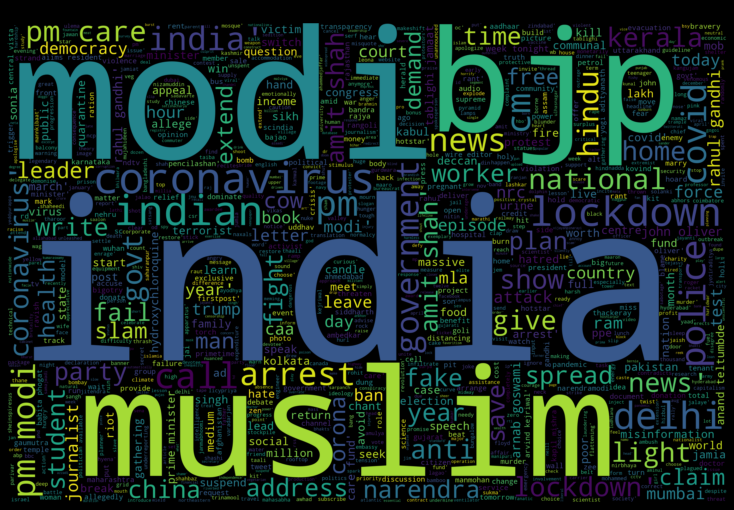

In [10]:
make_wordcloud(data['title'][data.flair == 'Politics'])

## Foody submissions

Creating wordcloud...


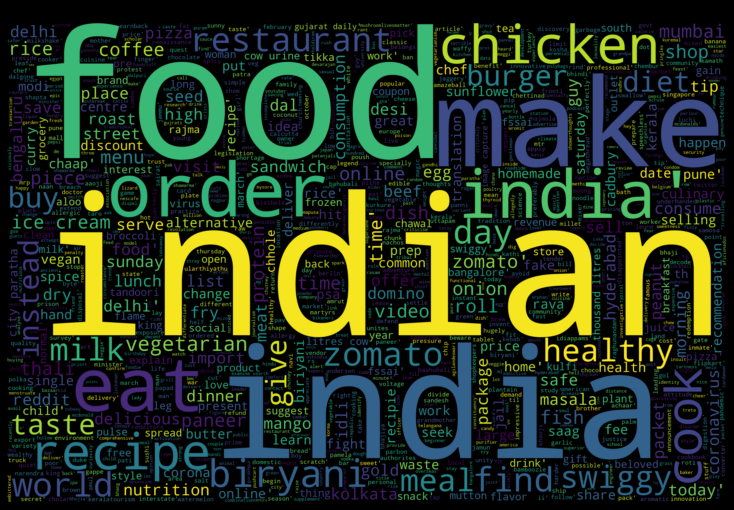

In [11]:
make_wordcloud(data['title'][data.flair == 'Food'])

## Business and finance talks about..

Creating wordcloud...


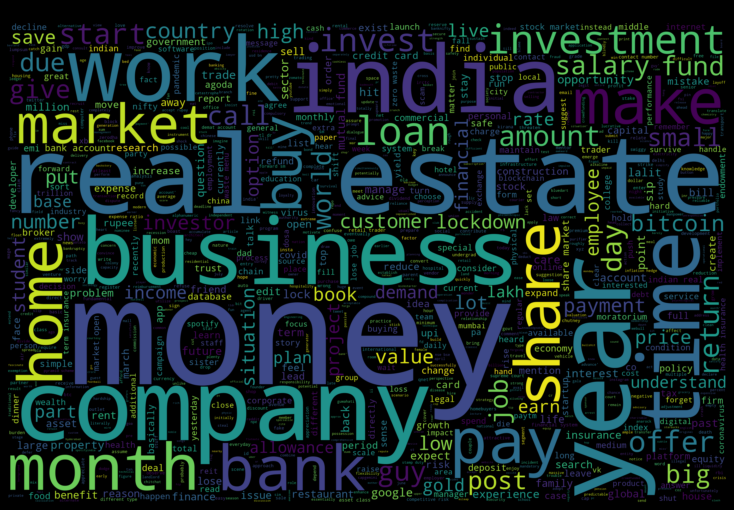

In [12]:
make_wordcloud(data['body'][data.flair == 'Business/Finance'])